In [1]:
import tensorflow as tf
from tensorflow import keras
import os
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout,Activation
from tensorflow.keras import backend as K
from tensorflow.keras.utils import get_custom_objects
from keras.optimizers import SGD, Adam, RMSprop, Adagrad, Adadelta, Adam, Adamax, Nadam

# target parameters of f(x) = m*x + b
m = 2 # slope
b = 1 # intersect

# usiamo caratteri leggibili!
plt.rcParams.update({'font.size': 16})

pesi =[]

def models(sig,N_train,N_epochs,ep=True):

    # generate training inputs
    np.random.seed(0)
    x_train = np.random.uniform(-1, 1, N_train)
    x_valid = np.random.uniform(-1, 1, 50)
    x_valid.sort()
    y_target = m * x_valid + b # ideal (target) linear function

    sigma =sig # noise standard deviation, for the moment it is absent
    y_train = np.random.normal(m * x_train + b, sigma) # actual measures from which we want to guess regression parameters
    y_valid = np.random.normal(m * x_valid + b, sigma)

    model = tf.keras.Sequential()
    model.add(Dense(1, input_shape=(1,)))

    # compile the model choosing optimizer, loss and metrics objects
    model.compile(optimizer='sgd', loss='mse', metrics=['mse'])
    # report training progress against validation data
    checkpoint_filepath = './checkpoint'
    model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
        filepath=checkpoint_filepath,
        save_weights_only=True,
        save_best_only=True)
    if (ep==True):
        for i in range(N_epochs):
            history = model.fit(x=x_train, y=y_train, 
                  batch_size=32, epochs=i,
                  shuffle=True, # a good idea is to shuffle input before at each epoch,
                  verbose=0,
                  validation_data=(x_valid, y_valid))
            # return weights and biases
            pesi.append( model.get_weights())
            if(i==0 or i%5==0):
                x_predicted = np.random.uniform(-1, 1, 100)
                y_predicted = model.predict(x_predicted)
                plt.title('Fit all epoca {}'.format(i))
                plt.scatter(x_predicted, y_predicted,color='r')
                plt.plot(x_valid, y_target)
                plt.xlabel("x")
                plt.ylabel("y")
                plt.grid(True)
                plt.show()
    else:
        history = model.fit(x=x_train, y=y_train, 
                  batch_size=32, epochs=N_epochs,
                  shuffle=True, # a good idea is to shuffle input before at each epoch,
                  verbose=0,
                  validation_data=(x_valid, y_valid))
            # return weights and biases
        pesi.append( model.get_weights())
        x_predicted = np.random.uniform(-1, 1, 100)
        y_predicted = model.predict(x_predicted)
        plt.title('Fit dopo {} epoche con $\sigma$={}e N_elem= {}'.format(N_epochs,sig,N_train))
        plt.scatter(x_predicted, y_predicted,color='r')
        plt.plot(x_valid, y_target)
        plt.xlabel("x")
        plt.ylabel("y")
        plt.grid(True)
        plt.show()

2023-06-05 11:33:44.697108: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-06-05 11:33:44.883322: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-06-05 11:33:44.948153: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-06-05 11:33:45.990505: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; 

Per prima cosa si guarda come varia il modello a seconda delle epoche con varianza del rumore e numero di punti fissati, un modo per verificare la bontà del fit è anche verificare quanto distano i pesi e bias dalla slope reale e intercetta reale rispettivamente che nel caso semplice di una regressione lineare è un buon modo per verificare l'accuratezza del modello 

2023-06-05 11:33:50.438806: E tensorflow/stream_executor/cuda/cuda_driver.cc:265] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
2023-06-05 11:33:50.439027: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (fedora): /proc/driver/nvidia/version does not exist
2023-06-05 11:33:50.441006: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


4/4 [==============================] - 0s 2ms/step


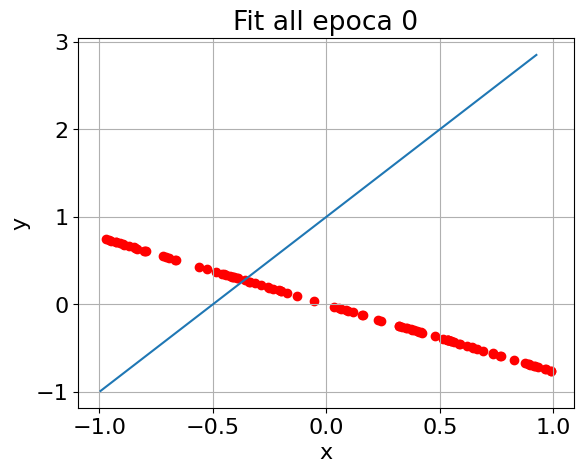

4/4 [==============================] - 0s 2ms/step


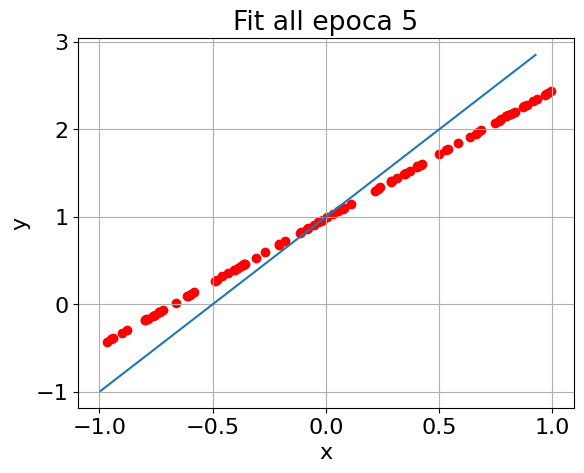

4/4 [==============================] - 0s 2ms/step


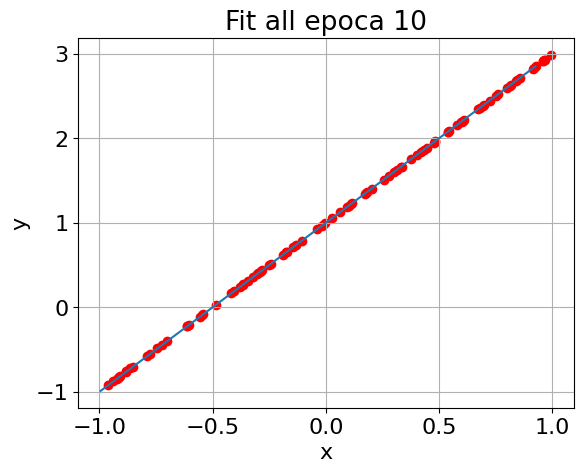

4/4 [==============================] - 0s 2ms/step


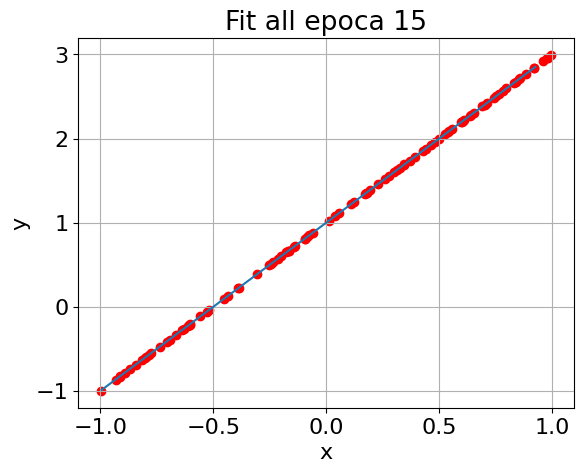

4/4 [==============================] - 0s 2ms/step


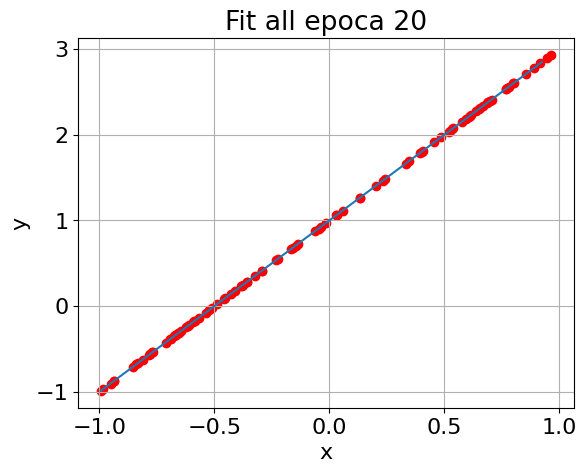

4/4 [==============================] - 0s 2ms/step


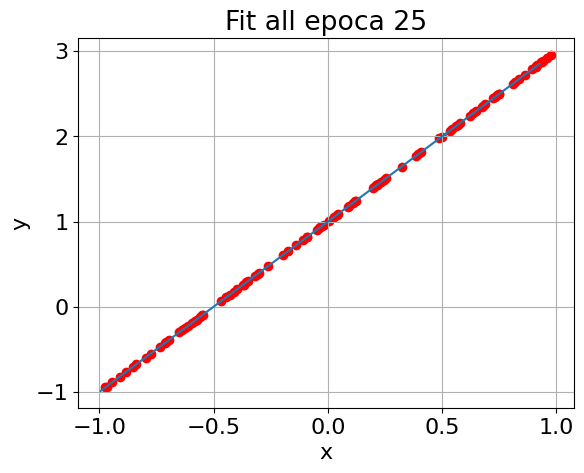

4/4 [==============================] - 0s 2ms/step


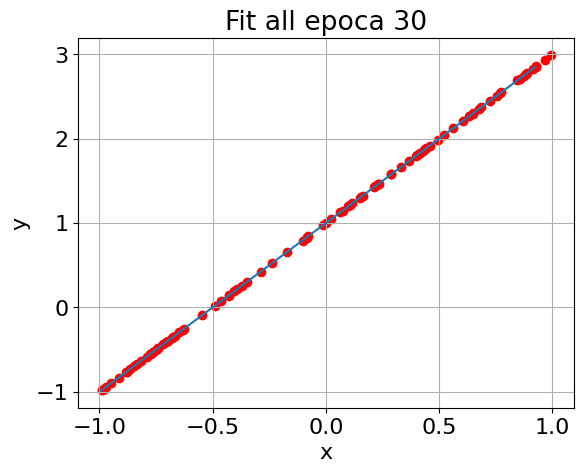

4/4 [==============================] - 0s 2ms/step


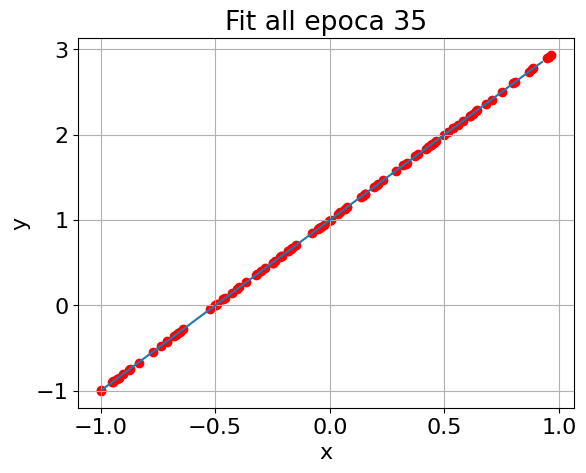

4/4 [==============================] - 0s 2ms/step


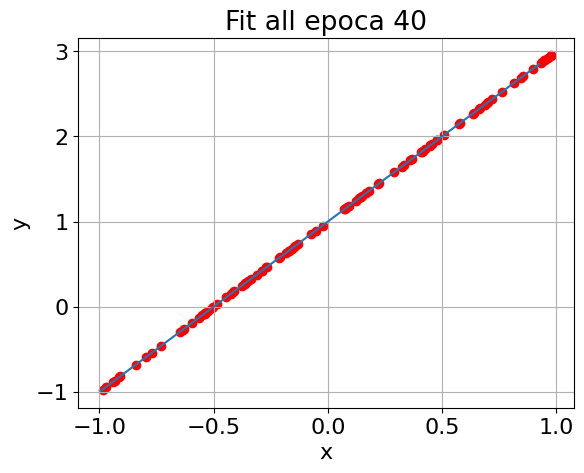

4/4 [==============================] - 0s 2ms/step


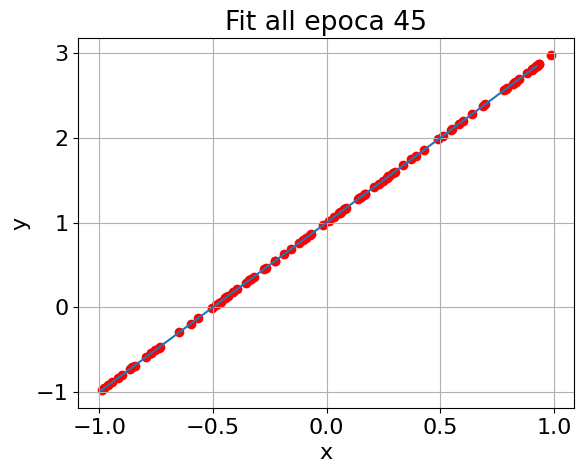

In [2]:
models(0.01,500,50)

4/4 [==============================] - 0s 2ms/step


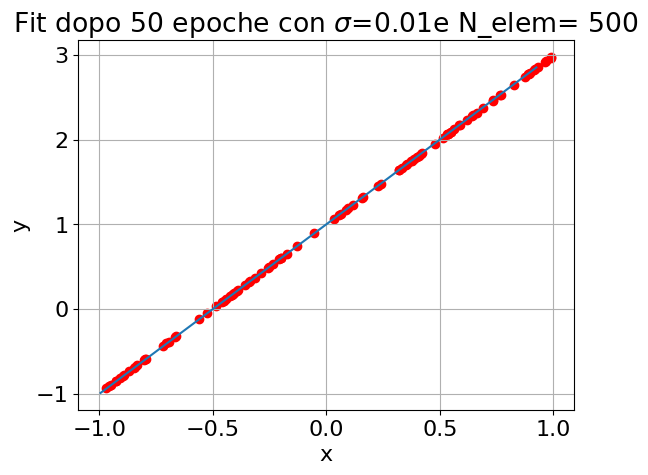

In [3]:
models(0.01,500,50,ep=False)

In [4]:
slope = []
interc = []
for i in range(50):
    slope.append(pesi[i][0][0][0])
    interc.append(pesi[i][1][0])


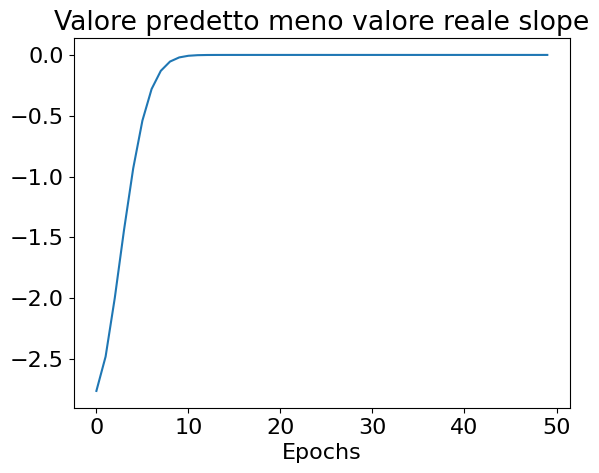

In [5]:
slope = [x-m for x in slope]
plt.title('Valore predetto meno valore reale slope')
plt.xlabel('Epochs')
plt.plot(slope)
plt.show()

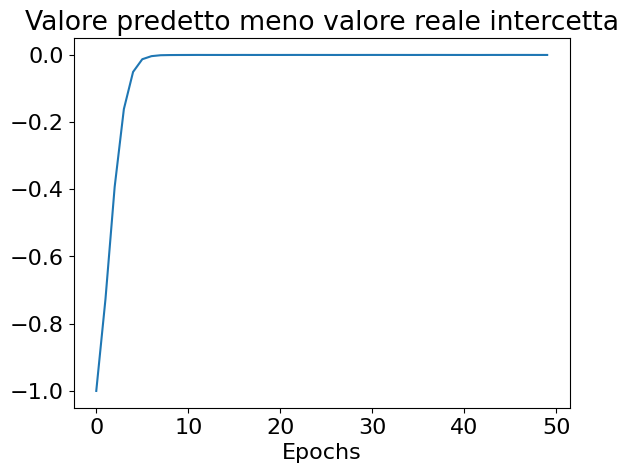

In [6]:
interc = [x-b for x in interc]
plt.title('Valore predetto meno valore reale intercetta')
plt.xlabel('Epochs')
plt.plot(interc)
plt.show()

Quindi si vede che il valore tende a saturare con l'aumentare delle epoche e a tendere sempre più al valore reale.\
Ora si può passare ad osservare come varia la precisione del modello al variare del numero di elementi utilizzati per allenare il percettrone,questo si effettua fissando le epoche e la sigma.\
Le epoche si possono porre a 50 dato che sembra essere un buon numero di epoche da utilizzare per ottenere un training efficace.\
Quindi quello che si verifica è il risultato finale.

In [7]:
N_elem = np.linspace(100,1000,10).astype(int)
N_elem # creo array con la lunghezza dei dati che voglio

array([ 100,  200,  300,  400,  500,  600,  700,  800,  900, 1000])

4/4 [==============================] - 0s 2ms/step


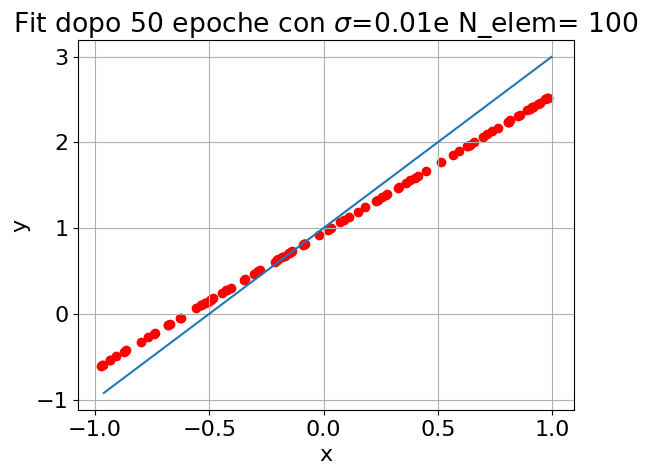

4/4 [==============================] - 0s 2ms/step


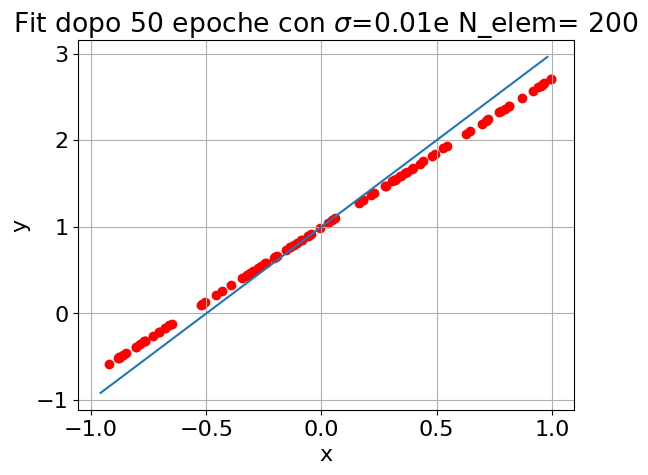

4/4 [==============================] - 0s 2ms/step


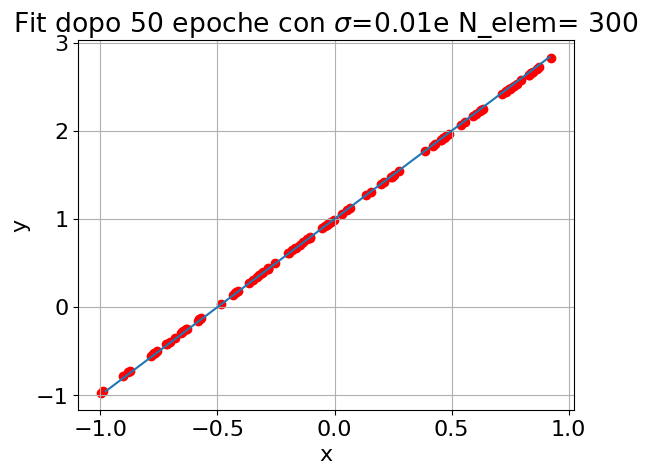

4/4 [==============================] - 0s 2ms/step


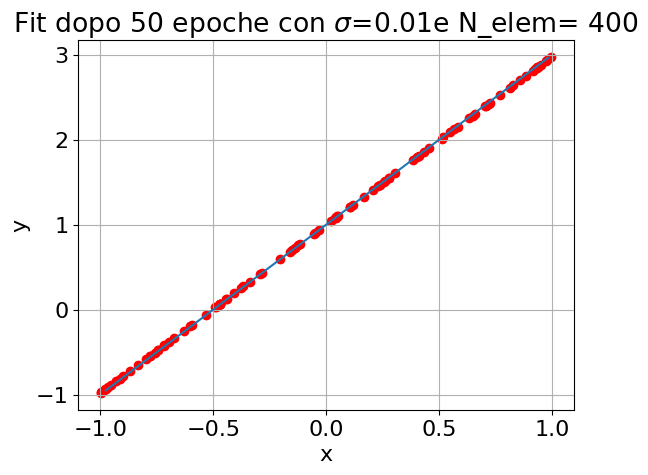

4/4 [==============================] - 0s 2ms/step


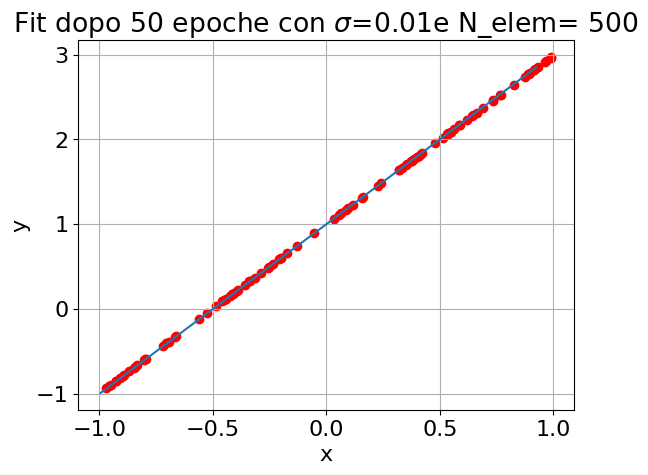

4/4 [==============================] - 0s 2ms/step


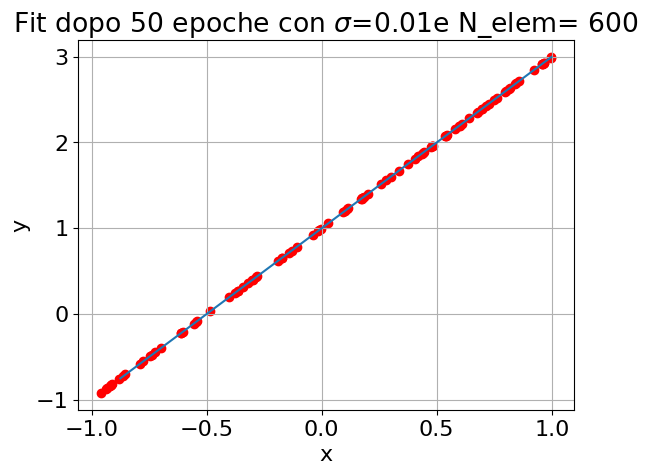

4/4 [==============================] - 0s 2ms/step


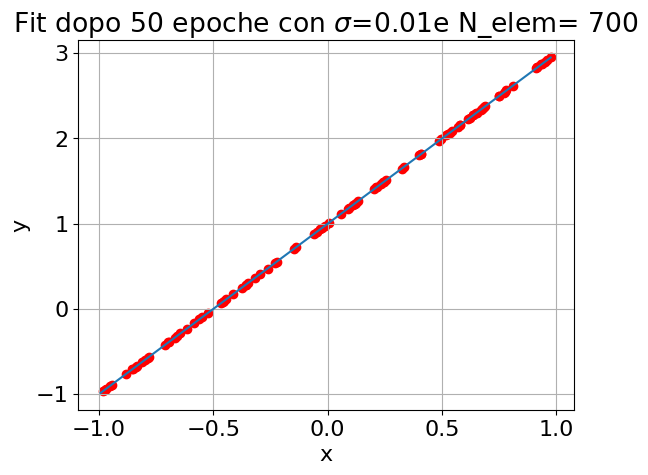

4/4 [==============================] - 0s 2ms/step


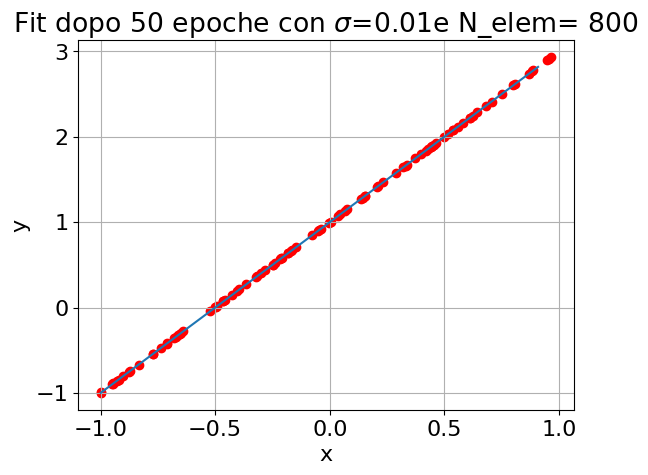

4/4 [==============================] - 0s 2ms/step


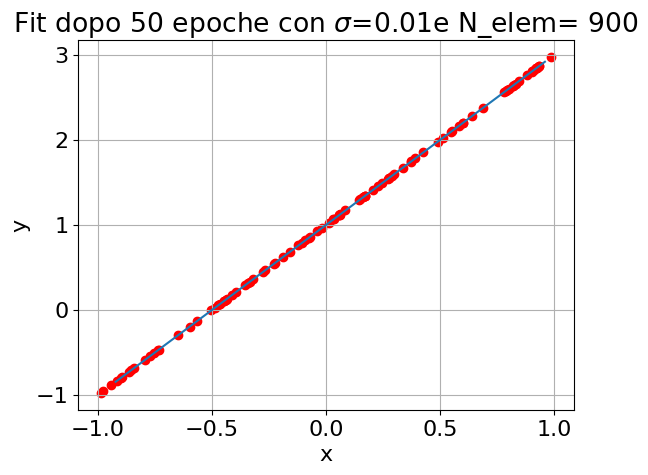

4/4 [==============================] - 0s 2ms/step


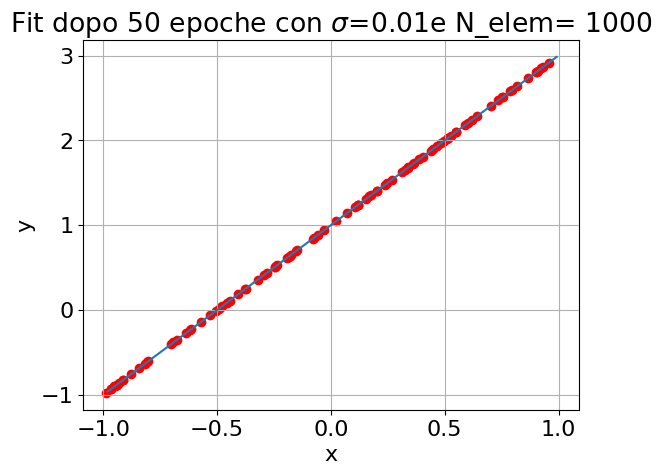

In [8]:
slope_N = []
interc_N = []
for i in range(len(N_elem)):
    models(0.01,N_elem[i],50,ep=False)
    slope_N.append(pesi[-1][0][0][0])
    interc_N.append(pesi[-1][1][0])

Il modello sembra migliorare il fit con i dati  all'aumentare del numero di dati disponibili.

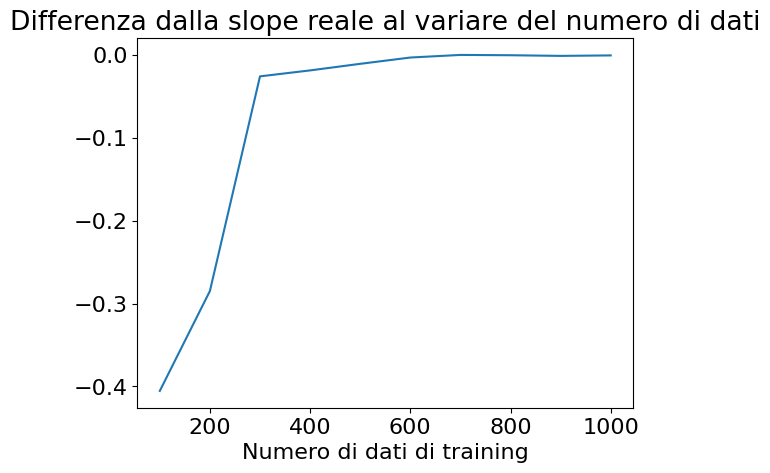

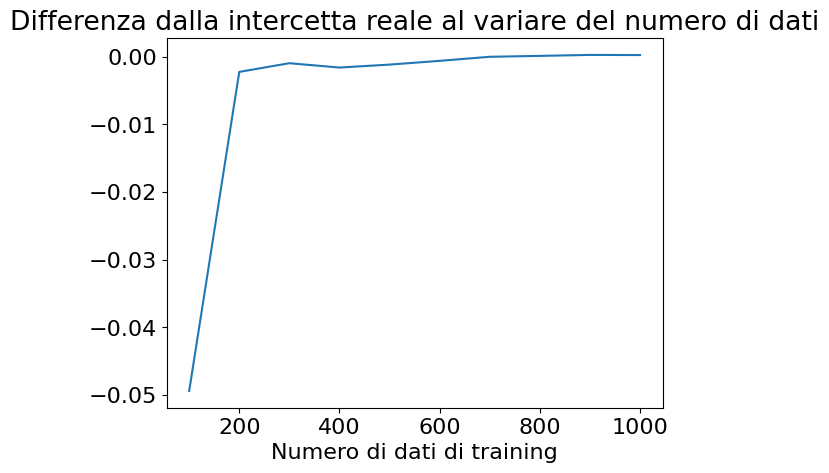

In [9]:
slope_N=[x-m for x in slope_N]
interc_N=[x-b for x in interc_N]
plt.title("Differenza dalla slope reale al variare del numero di dati")
plt.xlabel("Numero di dati di training")
plt.plot(N_elem,slope_N)
plt.show()
plt.title("Differenza dalla intercetta reale al variare del numero di dati")
plt.xlabel("Numero di dati di training")
plt.plot(N_elem,interc_N)
plt.show()

Come aspettato si vede che sia per la slopre che per l'intercetta all'aumentare del numero di dati aumente la precisione del modello, fino ad arrivare ad un plateau. Ora si passa a vedere come varia al variare della sigma sul rumore. Intuitivamente ci si aspetta che al diminuire del rumore il fit migliori, o che avenga con meno epoche.( di per se se non si aggiunge rumore i dati sono già su una retta, mentre non è così chiaro se aggiungo del rumore).\
Si è già visto che con $\sigma$ = 0.01 il modello riesce a fittare bene i dati dopo poche epoche. Vediamo con dati diversi

In [10]:
sigma_N = np.linspace(0.0,1.5,10).round(2)
sigma_N

array([0.  , 0.17, 0.33, 0.5 , 0.67, 0.83, 1.  , 1.17, 1.33, 1.5 ])

4/4 [==============================] - 0s 2ms/step


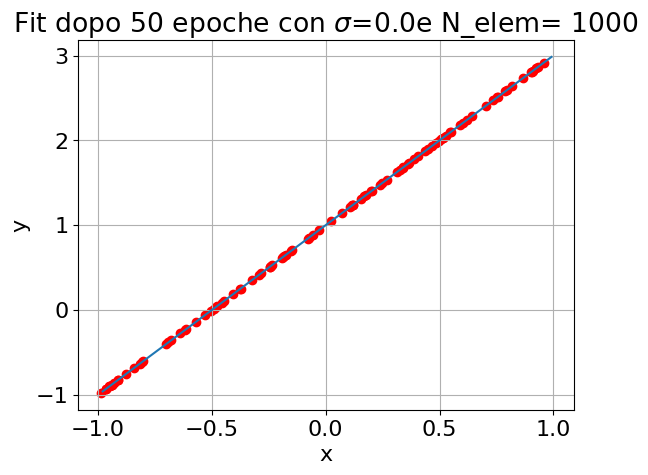

4/4 [==============================] - 0s 2ms/step


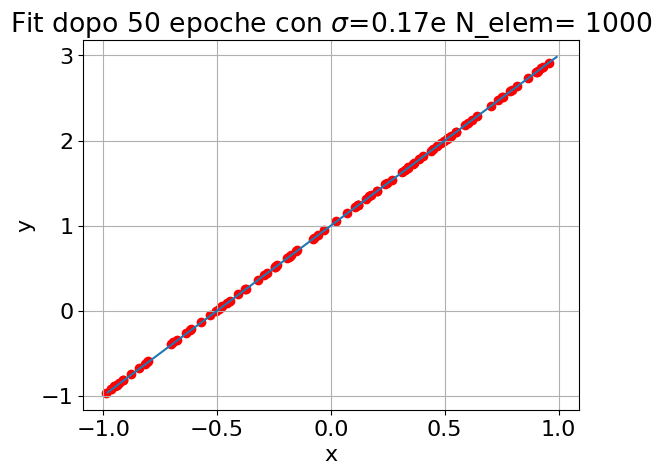

4/4 [==============================] - 0s 2ms/step


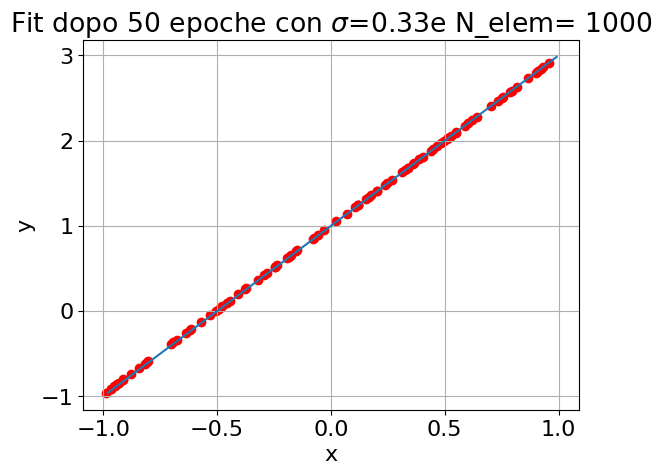

4/4 [==============================] - 0s 2ms/step


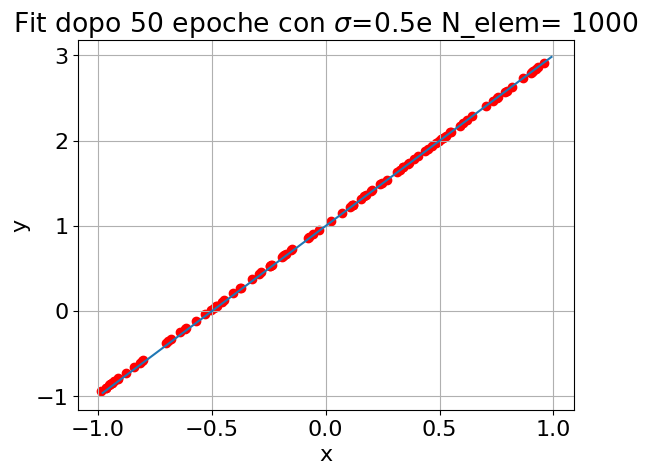

4/4 [==============================] - 0s 2ms/step


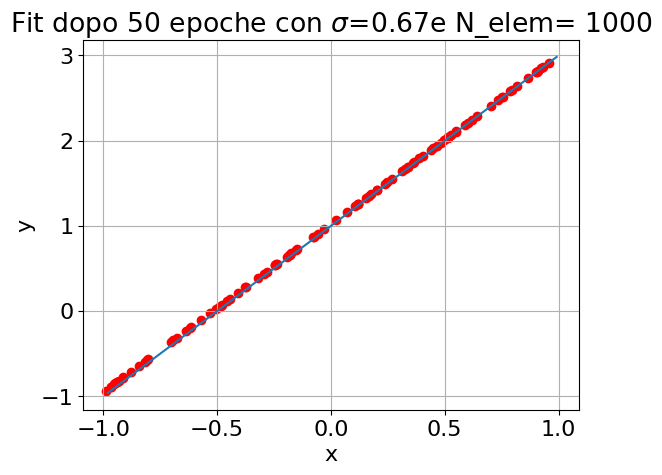

4/4 [==============================] - 0s 2ms/step


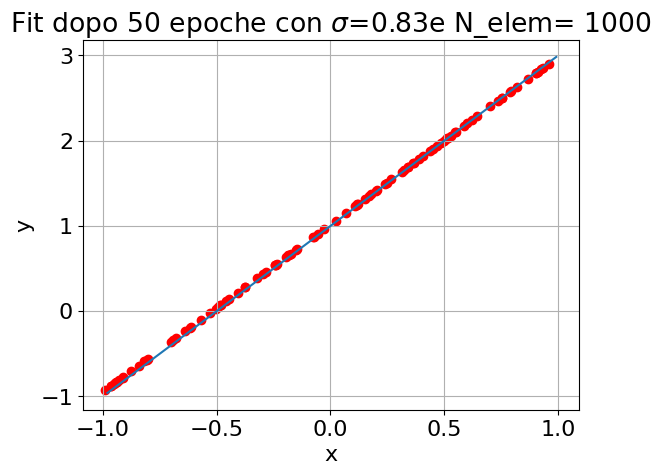

4/4 [==============================] - 0s 2ms/step


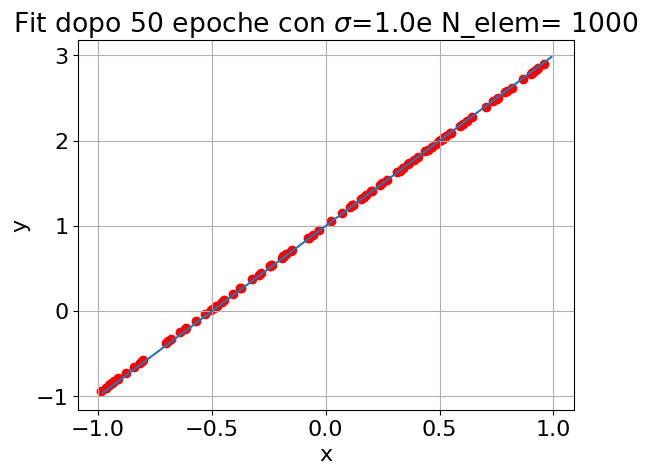

4/4 [==============================] - 0s 2ms/step


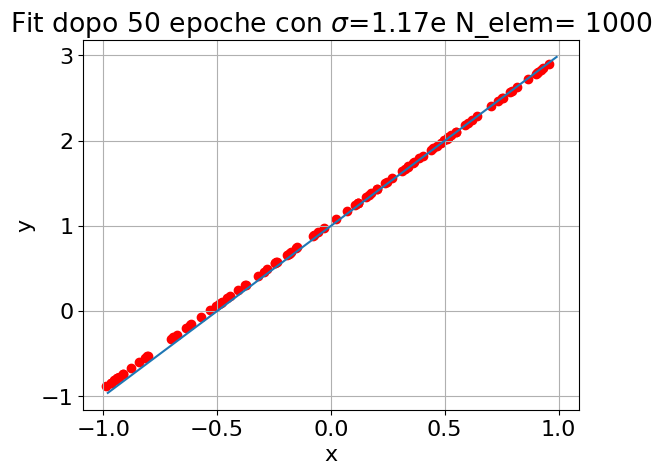

4/4 [==============================] - 0s 2ms/step


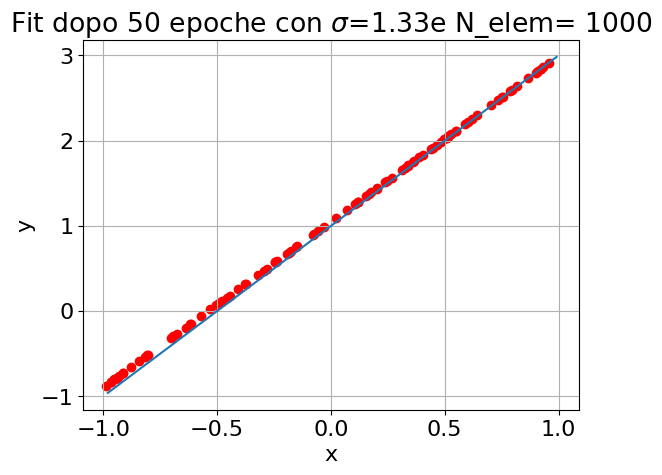

4/4 [==============================] - 0s 2ms/step


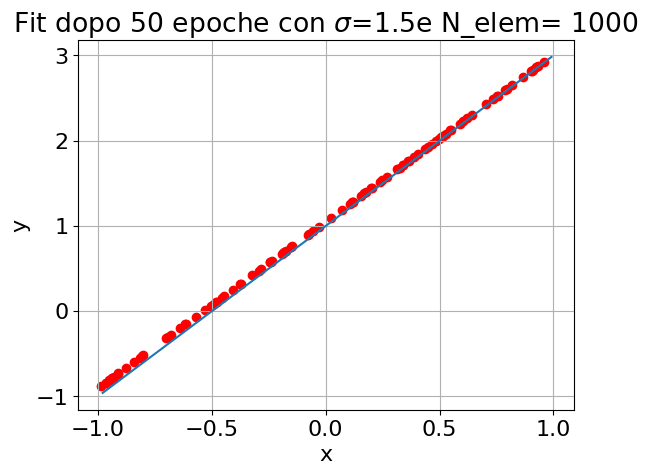

In [11]:
slope_s = []
interc_s = []
for i in range(len(sigma_N)):
    models(sigma_N[i],1000,50,ep=False)
    slope_s.append(pesi[-1][0][0][0])
    interc_s.append(pesi[-1][1][0])

I fit sembrano venire bene nonostante l'aumentare della sigma, anche se si nota una leggera variazione dalla "retta reale".

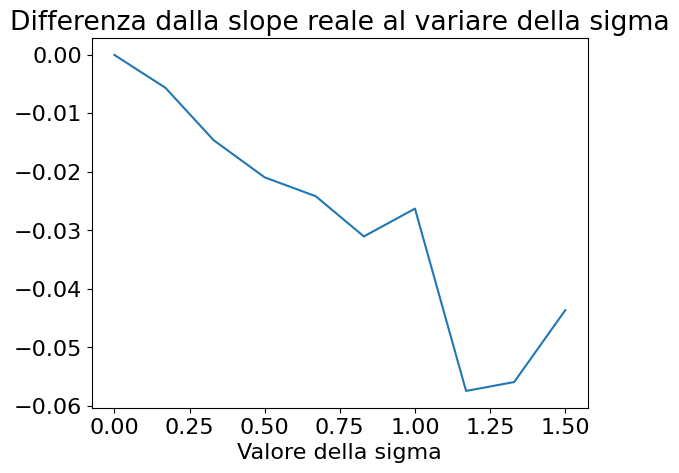

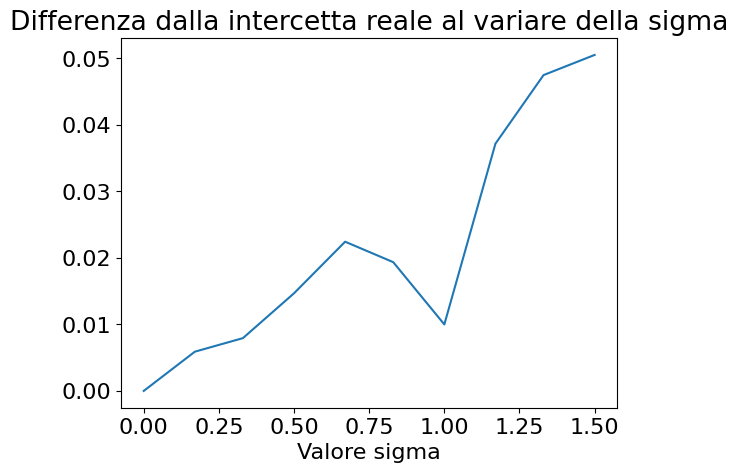

In [12]:
slope_s=[x-m for x in slope_s]
interc_s=[x-b for x in interc_s]
plt.title("Differenza dalla slope reale al variare della sigma")
plt.xlabel("Valore della sigma")
plt.plot(sigma_N,slope_s)
plt.show()
plt.title("Differenza dalla intercetta reale al variare della sigma")
plt.xlabel("Valore sigma")
plt.plot(sigma_N,interc_s)
plt.show()

Come si evince dai grafici aumentando la sigma il valore dei parametri ottenuti dal modello tende a distaccarsi da quello reale a parità di epoche e numero di dati di training( rimane la domanda: se aumento la sigma e le epoche, queste due azioni si bilanciano a parità di dati? e poi se fisso le epoche ma aumento dati e sigma, come varia il valori del parametri ottenuto dal modello rispetto a quelli reali?